<a href="https://colab.research.google.com/github/Parabolistic/Learning/blob/master/Brigada11_lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Подключение библиотек**

In [0]:
import pandas as pd     # для чтения и записи табличных файлов
import numpy as np      # для математической обработки данных
import matplotlib.pyplot as plt # для построения графиков
import matplotlib.ticker as ticker # для управления делениями осей

**2. Чтение данных**

In [0]:
#исходный файл https://drive.google.com/file/d/1ZdeDADIL2HrYa8fcfXCSMT7RtxiZ5x-9/view
 
url = "https://drive.google.com/uc?export=download&id=1ZdeDADIL2HrYa8fcfXCSMT7RtxiZ5x-9"
input_df = pd.read_table(url, sep = '\t',  header=None, decimal=',') 
input_df.head()

,0,1
0,1,27.409649
1,2,17.518286
2,3,16.460181
3,4,15.910253
4,5,13.604618


In [0]:
input_df.tail()

,0,1
91,116,12.998751
92,117,13.520172
93,118,15.517817
94,119,24.032706
95,120,29.846246


**3. График**

In [0]:
pamir = input_df.iloc[: , 1].values 

from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
 
output_notebook()
 
p = figure(plot_width = 800, plot_height = 400)
 
p.line(np.arange(len(pamir)), pamir, line_width = 2)
p.scatter(np.arange(len(pamir)), pamir)
p.xaxis.axis_label = 'Время'
p.yaxis.axis_label = 'Потребление'
 
show(p)

#сохранение графика
plt.savefig('pamir')
data_frame = pd.DataFrame(pamir)
data_frame.to_csv('pamir.csv', index = False, header = ['average_monthly_consumption_chart'])

<Figure size 432x288 with 0 Axes>

**4. Амплитудно-частотный спектр**

In [0]:
def fft_sample(signal, times, sampling_rate):
    n = len(times) # число отсчетов в сигнале
 
    k = np.arange(n)
    T = n / sampling_rate
 
    frq = (k / T)[range(n // 2)] # диапазон частот в спектре
 
    # применение быстрого преобразования Фурье 
    # (Fast Fourier Transform) с нормализацией
    fft_output = np.fft.fft(signal) / n 
 
    # достаточно половины спектра, поэтому половину обрежем
    # , а оставшуюся умножим на два
    fft_output = fft_output[range(n // 2)]
    fft_output[1 : ] *= 2
 
    # построение графиков
 
    # 2 строки и 1 столбец - графики будут друг по другом
    fig, ax = plt.subplots(2, 1, figsize = (20, 8)) 
    
    # верхний график - исходный сигнал
    # по оси абсцисс - время
    # по оси ординат - сигнал
    ax[0].plot(times, signal, 'blue')
    ax[0].set_xlabel('Time') 
    ax[0].set_ylabel('Amplitude')
    ax[0].grid(True)
 
    # нижний - амплитудный спектр
    # по оси абсцисс - частота
    # по оси ординат - амплитуда соответствующих гармоник
    ax[1].stem(frq, abs(fft_output), 'red')
    ax[1].set_xlabel('Freq (Hz)')
    ax[1].set_ylabel('|A(freq)|')
 
    # цену деления оси нужно подбирать
    ax[1].xaxis.set_major_locator(ticker.MultipleLocator(0.05))
    ax[1].xaxis.set_minor_locator(ticker.MultipleLocator(0.01))
    ax[1].yaxis.set_major_locator(ticker.MultipleLocator(5))
    ax[1].yaxis.set_minor_locator(ticker.MultipleLocator(5))
    ax[1].grid(True)
 
    plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:34: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


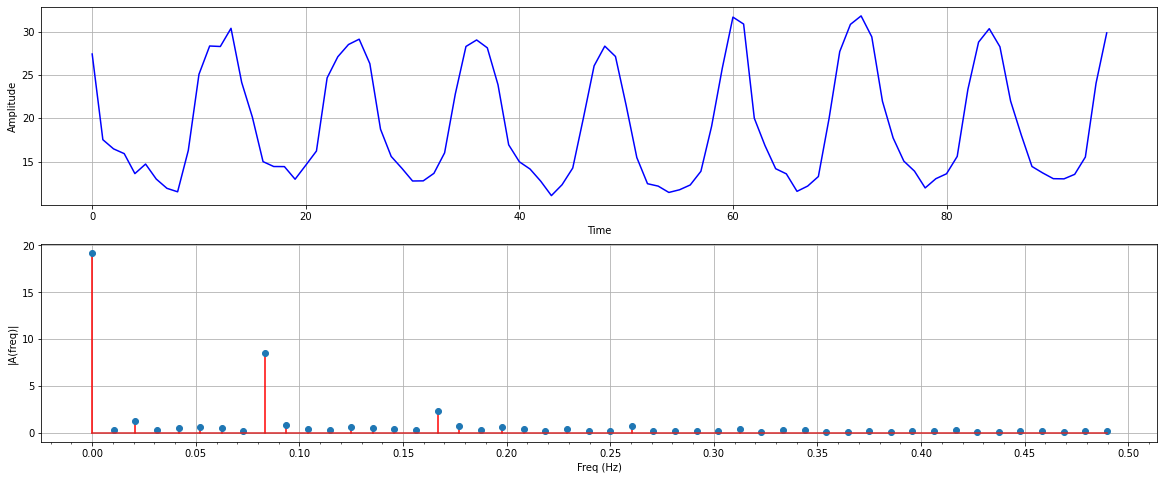

<Figure size 432x288 with 0 Axes>

In [0]:
signal = pamir
sampling_rate = 1  # частота записи данных 
time_interval = 1 / sampling_rate # шаг по времени между сэмплами (точками, отсчетами)
 
# генерация ряда таймстампов 
times = np.arange(0, len(pamir), time_interval) 
 
fft_sample(signal, times, sampling_rate)

plt.savefig('amp_frq')